<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

## Problem Statement

Doctors Go Anywhere are looking to expand their outreach after their recent funding. In order to understand where their services would be the most valuable, they would like to identify the Top 10 regions that have the lowest access to healthcare.

The objective of this project, alongside identifing the above, we will also be looking into the following statements:

1) Investigate how the money invested by the Government into healthcare correlates a countries position in the rankings
2) Investigate how the Life Expectancy correlates with a countries position

# Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Imports

In [2]:
#Data files being used

population = pd.read_csv('../data/population.csv')
life_expect = pd.read_csv('../data/life_expectancy.csv')
health_aid = pd.read_csv('../data/government_health_spending_per_person_us.csv')
medical_doc = pd.read_csv('../data/medical_doctors_per_1000_people.csv')


# Data Cleaning

In [3]:
# Abbreviation conversion function 
def string_tonum(org_fig):
    keys = {'K': 1000, 'M': 1000000, 'B': 1000000000, '0': 1}

    num = float(org_fig[:-1])
    letter = org_fig[-1].upper()
    
    if letter in keys:
        return num * keys[letter]
    
print(string_tonum('5M'))

5000000.0


### Population 

In [4]:
population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [5]:
population.head()
popul23 = population[['country'] + [str(year) for year in range(1995, 2011)]]
missing_pop = popul23[popul23.isnull().any(axis=1)]
print(missing_pop)



     country 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007  \
74  Holy See  783  792  803  809  803  779  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   2008 2009 2010  
74  NaN  NaN  NaN  


In [6]:
#removing Holy See from dataset as too many dates points missing
popul23.dropna(inplace=True) 
popul23[popul23['2005'].astype(str).apply(lambda s: s[-1]).isin(['n', '0'])]
popul23.head()

/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/782452170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popul23.dropna(inplace=True)


,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,16.4M,17.1M,17.8M,18.5M,19.3M,19.5M,19.7M,21M,22.6M,23.6M,24.4M,25.4M,25.9M,26.4M,27.4M,28.2M
1,Angola,13.9M,14.4M,14.9M,15.4M,15.9M,16.4M,16.9M,17.5M,18.1M,18.8M,19.5M,20.2M,20.9M,21.7M,22.5M,23.4M
2,Albania,3.28M,3.27M,3.25M,3.23M,3.21M,3.18M,3.15M,3.12M,3.09M,3.06M,3.03M,3M,2.98M,2.95M,2.93M,2.91M
3,Andorra,62.9k,64.1k,64.7k,65.2k,65.7k,66.1k,67.8k,70.8k,73.9k,76.9k,79.8k,80.2k,78.2k,76.1k,73.9k,71.5k
4,United Arab Emirates,2.43M,2.57M,2.75M,2.92M,3.1M,3.28M,3.45M,3.63M,3.81M,3.99M,4.28M,4.9M,5.87M,6.99M,7.99M,8.48M


In [7]:
#Checking data types before applying cleaning function
popul23.dtypes

country    object
1995       object
1996       object
1997       object
1998       object
1999       object
2000       object
2001       object
2002       object
2003       object
2004       object
2005       object
2006       object
2007       object
2008       object
2009       object
2010       object
dtype: object

In [8]:
#Converting the numbers from abbreviations
for yrs in popul23.columns[1:]:
    popul23[yrs] = popul23[yrs].map(string_tonum)

/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/1902473298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popul23[yrs] = popul23[yrs].map(string_tonum)


In [9]:
popul23.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,16400000.0,17100000.0,17800000.0,18500000.0,19300000.0,19500000.0,19700000.0,21000000.0,22600000.0,23600000.0,24400000.0,25400000.0,25900000.0,26400000.0,27400000.0,28200000.0
1,Angola,13900000.0,14400000.0,14900000.0,15400000.0,15900000.0,16400000.0,16900000.0,17500000.0,18100000.0,18800000.0,19500000.0,20200000.0,20900000.0,21700000.0,22500000.0,23400000.0
2,Albania,3280000.0,3270000.0,3250000.0,3230000.0,3210000.0,3180000.0,3150000.0,3120000.0,3090000.0,3060000.0,3030000.0,3000000.0,2980000.0,2950000.0,2930000.0,2910000.0
3,Andorra,62900.0,64100.0,64700.0,65200.0,65700.0,66100.0,67800.0,70800.0,73900.0,76900.0,79800.0,80200.0,78200.0,76100.0,73900.0,71500.0
4,United Arab Emirates,2430000.0,2570000.0,2750000.0,2920000.0,3100000.0,3280000.0,3450000.0,3630000.0,3810000.0,3990000.0,4280000.0,4900000.0,5870000.0,6990000.0,7990000.0,8480000.0


In [10]:
#Saving the cleaned population file
popul23.to_csv('../data/Population23.csv', index = False)

### Life Expectancy

In [11]:
life_expect.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,54.3,54.7,54.5,53.3,54.7,54.7,54.8,55.5,56.5,57.1,57.6,58.0,58.5,59.2,59.9,60.5
1,Angola,51.2,51.7,51.6,50.6,51.9,52.8,53.4,54.5,55.1,55.5,56.4,57.0,58.0,58.8,59.5,60.2
2,Albania,74.6,74.5,72.9,74.8,75.1,75.4,76.0,75.9,75.6,75.8,76.2,76.9,77.5,77.6,78.0,78.1
3,Andorra,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1,81.2,81.3,81.4,81.5,81.7,81.8,81.8,81.8
4,United Arab Emirates,68.8,68.9,69.0,69.2,69.2,69.1,69.2,69.4,69.3,69.1,69.2,69.5,70.0,70.4,70.6,70.8


In [12]:
#creating new variable with only 1995 to 2010
life_expect23 = life_expect[['country'] + [str(year) for year in range(1995, 2011)]]

In [13]:
#locating missing data
life_expect23[life_expect23.isnull().any(axis=1)]

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010


In [14]:
#Checking final selected data
life_expect23.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,54.3,54.7,54.5,53.3,54.7,54.7,54.8,55.5,56.5,57.1,57.6,58.0,58.5,59.2,59.9,60.5
1,Angola,51.2,51.7,51.6,50.6,51.9,52.8,53.4,54.5,55.1,55.5,56.4,57.0,58.0,58.8,59.5,60.2
2,Albania,74.6,74.5,72.9,74.8,75.1,75.4,76.0,75.9,75.6,75.8,76.2,76.9,77.5,77.6,78.0,78.1
3,Andorra,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1,81.2,81.3,81.4,81.5,81.7,81.8,81.8,81.8
4,United Arab Emirates,68.8,68.9,69.0,69.2,69.2,69.1,69.2,69.4,69.3,69.1,69.2,69.5,70.0,70.4,70.6,70.8


In [15]:
#Saving final life expectancy data
life_expect23.to_csv('../data/Life_expectancy.csv', index = False)

### Health aid data

In [16]:
health_aid.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
1,Angola,13.5,8.72,10.5,6.65,6.55,12.5,18.3,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00
2,Albania,13.9,17.10,14.2,18.60,28.10,27.2,30.5,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
3,Andorra,897.0,983.00,967.0,1340.00,942.00,862.0,890.0,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00
4,UAE,583.0,580.00,588.0,565.00,559.00,577.0,638.0,578.000,611.00,588.00,608.00,659.00,718.0,1010.00,1310.00,1080.00


In [17]:
# Identifying all missing data
health_aid[health_aid.isnull().any(axis=1)]

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,1.25,1.61,2.52,2.81,3.50,3.75,3.91,4.39
73,Honduras,20.40,17.60,19.20,25.80,25.90,41.50,43.60,47.400,59.00,55.40,53.60,54.30,62.80,70.80,89.20,NaN
81,Iraq,NaN,0.03,0.04,0.30,0.48,0.39,0.43,0.270,8.32,45.00,41.70,42.10,75.00,120.00,157.00,200.00
94,South Korea,170.00,206.00,202.00,153.00,212.00,NaN,296.00,319.000,365.00,415.00,526.00,659.00,762.00,692.00,689.00,848.00
98,Liberia,NaN,NaN,NaN,2.03,2.49,2.63,2.86,1.920,1.56,1.96,2.67,3.37,5.88,9.07,9.66,9.49
111,Mexico,74.20,75.80,99.90,108.00,132.00,153.00,167.00,174.000,175.00,199.00,215.00,233.00,256.00,281.00,253.00,NaN
127,Nicaragua,37.20,34.50,23.40,26.20,23.70,29.00,29.50,30.000,34.80,36.70,40.20,42.90,50.80,57.70,57.00,NaN
156,Somalia,2.01,2.19,2.62,3.42,3.34,3.04,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Zimbabwe,28.10,29.40,30.10,29.40,17.60,31.50,25.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#dropping anything with less than 2 data points
health_aid = health_aid.dropna(subset=health_aid.columns[1:], thresh = 2)

In [19]:
#Filling Na with 0 to make easier to compute
health_aid = health_aid.fillna(0)
health_aid.isnull().sum()

country    0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
dtype: int64

In [20]:
#Saving file
health_aid.to_csv('../data/Health_aid.csv', index = False)
health_aid.isnull().sum()

country    0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
dtype: int64

### Medical Doctor data

In [21]:
medical_doc.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.236,0.252,0.241,0.285,0.298,0.285,0.278,NaN,NaN,NaN
2,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215,NaN,NaN
3,Albania,0.276,NaN,NaN,NaN,NaN,0.481,NaN,NaN,NaN,...,1.230,1.220,1.270,1.280,NaN,NaN,1.220,NaN,2.16,1.65
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.330,NaN,NaN,NaN,NaN


In [22]:
#Selecting year range
medical_doc20 = medical_doc[['country'] + [str(year) for year in range(1995,2011)]]
medical_doc20

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,1.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,0.1100,NaN,NaN,NaN,0.19,NaN,NaN,NaN,NaN,0.1600,0.1740,0.1740,0.2130,0.2360
2,Angola,NaN,NaN,0.0592,NaN,NaN,NaN,NaN,NaN,NaN,0.0621,NaN,NaN,NaN,NaN,0.1310,NaN
3,Albania,1.360,1.380,1.3900,1.39,NaN,1.380,1.31,1.17,1.190,1.1900,NaN,1.1800,1.2000,NaN,1.2300,1.2300
4,Andorra,2.240,NaN,2.4600,2.53,NaN,2.570,2.60,2.90,3.330,3.1300,3.2300,3.0100,3.0100,NaN,3.1500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Samoa,NaN,0.344,NaN,0.33,0.691,NaN,NaN,NaN,0.282,NaN,0.2780,NaN,NaN,0.4640,NaN,0.3440
203,Yemen,0.247,0.230,0.2390,NaN,NaN,NaN,NaN,NaN,NaN,0.3450,NaN,NaN,NaN,0.3160,0.3170,NaN
204,South Africa,NaN,0.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7370,NaN,NaN,0.6990,0.6970,0.7070,0.7210
205,Zambia,0.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1300,0.0545,0.0533,NaN,0.0619,0.0606,0.0614


In [23]:
#Identifying missing data
medical_doc20[medical_doc20.isnull().any(axis=1)]

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,1.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,0.1100,NaN,NaN,NaN,0.19,NaN,NaN,NaN,NaN,0.1600,0.1740,0.1740,0.2130,0.2360
2,Angola,NaN,NaN,0.0592,NaN,NaN,NaN,NaN,NaN,NaN,0.0621,NaN,NaN,NaN,NaN,0.1310,NaN
3,Albania,1.360,1.380,1.3900,1.39,NaN,1.380,1.31,1.17,1.190,1.1900,NaN,1.1800,1.2000,NaN,1.2300,1.2300
4,Andorra,2.240,NaN,2.4600,2.53,NaN,2.570,2.60,2.90,3.330,3.1300,3.2300,3.0100,3.0100,NaN,3.1500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Samoa,NaN,0.344,NaN,0.33,0.691,NaN,NaN,NaN,0.282,NaN,0.2780,NaN,NaN,0.4640,NaN,0.3440
203,Yemen,0.247,0.230,0.2390,NaN,NaN,NaN,NaN,NaN,NaN,0.3450,NaN,NaN,NaN,0.3160,0.3170,NaN
204,South Africa,NaN,0.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7370,NaN,NaN,0.6990,0.6970,0.7070,0.7210
205,Zambia,0.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1300,0.0545,0.0533,NaN,0.0619,0.0606,0.0614


In [24]:
#dropping any row with less than 2 data points
medical_doc20 = medical_doc20.dropna(subset=medical_doc20.columns[1:], thresh = 2)
medical_doc20.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Afghanistan,NaN,NaN,0.1100,NaN,NaN,NaN,0.19,NaN,NaN,NaN,NaN,0.16,0.174,0.174,0.213,0.236
2,Angola,NaN,NaN,0.0592,NaN,NaN,NaN,NaN,NaN,NaN,0.0621,NaN,NaN,NaN,NaN,0.131,NaN
3,Albania,1.36,1.38,1.3900,1.39,NaN,1.38,1.31,1.17,1.19,1.1900,NaN,1.18,1.200,NaN,1.230,1.230
4,Andorra,2.24,NaN,2.4600,2.53,NaN,2.57,2.60,2.90,3.33,3.1300,3.23,3.01,3.010,NaN,3.150,NaN
5,UAE,NaN,NaN,NaN,NaN,NaN,1.80,1.98,2.00,2.08,1.9200,1.52,1.33,1.410,1.640,1.520,1.420


In [25]:
#filling in NaN with 0
medical_doc20 = medical_doc20.fillna(0)
medical_doc20.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Afghanistan,0.00,0.00,0.1100,0.00,0.0,0.00,0.19,0.00,0.00,0.0000,0.00,0.16,0.174,0.174,0.213,0.236
2,Angola,0.00,0.00,0.0592,0.00,0.0,0.00,0.00,0.00,0.00,0.0621,0.00,0.00,0.000,0.000,0.131,0.000
3,Albania,1.36,1.38,1.3900,1.39,0.0,1.38,1.31,1.17,1.19,1.1900,0.00,1.18,1.200,0.000,1.230,1.230
4,Andorra,2.24,0.00,2.4600,2.53,0.0,2.57,2.60,2.90,3.33,3.1300,3.23,3.01,3.010,0.000,3.150,0.000
5,UAE,0.00,0.00,0.0000,0.00,0.0,1.80,1.98,2.00,2.08,1.9200,1.52,1.33,1.410,1.640,1.520,1.420


In [26]:
#Saving file
medical_doc20.to_csv('../data/Medical_Doctors.csv', index = False)

## Merging DataFrames

In [27]:
#Renaming function
def renaming_popul(df):
    df = df.copy()  # Making copy to avoid SettingWithCopyWarning
    df = df.rename(columns={col: col + ' Populations' for col in df.columns[1:]})
    return df

def renaming_aid(df):
    df = df.copy() 
    df = df.rename(columns={col: col + ' Health Aid' for col in df.columns[1:]})
    return df

#Running function
popul23 = renaming_popul(popul23)
health_aid = renaming_aid(health_aid)

In [28]:
health_aid

,country,1995 Health Aid,1996 Health Aid,1997 Health Aid,1998 Health Aid,1999 Health Aid,2000 Health Aid,2001 Health Aid,2002 Health Aid,2003 Health Aid,2004 Health Aid,2005 Health Aid,2006 Health Aid,2007 Health Aid,2008 Health Aid,2009 Health Aid,2010 Health Aid
0,Afghanistan,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
1,Angola,13.5,8.72,10.50,6.65,6.55,12.50,18.3,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00
2,Albania,13.9,17.10,14.20,18.60,28.10,27.20,30.5,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
3,Andorra,897.0,983.00,967.00,1340.00,942.00,862.00,890.0,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00
4,UAE,583.0,580.00,588.00,565.00,559.00,577.00,638.0,578.000,611.00,588.00,608.00,659.00,718.0,1010.00,1310.00,1080.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Samoa,39.6,51.60,56.40,54.10,62.80,60.60,58.3,65.400,73.50,86.50,92.70,110.00,142.0,144.00,132.00,179.00
188,Yemen,12.4,11.00,9.44,10.10,10.80,13.60,14.3,14.200,16.60,14.50,14.30,16.30,17.1,21.10,16.80,15.30
189,South Africa,107.0,97.40,111.00,104.00,108.00,102.00,90.5,81.500,126.00,151.00,175.00,184.00,202.0,203.00,228.00,286.00
190,Zambia,13.2,13.00,16.80,13.60,9.02,9.23,11.7,14.700,16.20,18.40,24.10,35.00,31.1,43.20,36.70,43.90


In [29]:
#Merging and saving file
pop_aidmerged = pd.concat([popul23, health_aid], axis=1)
pop_aidmerged.to_csv('../data/Medical_Aid_and_Population.csv', index = False)
pop_aidmerged[pop_aidmerged['1995 Health Aid'].isnull()]

,country,1995 Populations,1996 Populations,1997 Populations,1998 Populations,1999 Populations,2000 Populations,2001 Populations,2002 Populations,2003 Populations,...,2001 Health Aid,2002 Health Aid,2003 Health Aid,2004 Health Aid,2005 Health Aid,2006 Health Aid,2007 Health Aid,2008 Health Aid,2009 Health Aid,2010 Health Aid
192,Samoa,175000.0,177000.0,179000.0,180000.0,182000.0,184000.0,186000.0,187000.0,187000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Yemen,16100000.0,16600000.0,17100000.0,17600000.0,18100000.0,18600000.0,19100000.0,19700000.0,20200000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,South Africa,44000000.0,44700000.0,45300000.0,45900000.0,46400000.0,46800000.0,47200000.0,47700000.0,48100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Zambia,8680000.0,8900000.0,9130000.0,9370000.0,9620000.0,9890000.0,10200000.0,10500000.0,10800000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Zimbabwe,11000000.0,11200000.0,11400000.0,11500000.0,11700000.0,11800000.0,11900000.0,12000000.0,12100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis & Visualisation

## Who are the Top 10 countries with the highest and lowest amount of doctors?

### Calculating the total number of doctors 

As the provided Medical Doctors by Gapminder is per 1000 we will be using the following formaula to calculate the total number of doctors.


    Total amount of doctors = (Doctor per 1000 mean / 1000) * Population mean


In [30]:
#First by calculating the average number of doctors and population per country across the years
doc_aver = [medical_doc20.set_index('country').mean(axis=1)]
pop_aver = [popul23.set_index('country').mean(axis=1)]
doc_aver = doc_aver[0]
pop_aver = pop_aver[0]
total_docs = (doc_aver / 1000) * pop_aver
total_docs[total_docs.isnull()]

country
Bermuda                NaN
Cayman Islands         NaN
Hong Kong, China       NaN
Liechtenstein          NaN
Monaco                 NaN
San Marino             NaN
South Sudan            NaN
Taiwan                 NaN
UAE                    NaN
UK                     NaN
USA                    NaN
United Arab Emirates   NaN
United Kingdom         NaN
United States          NaN
dtype: float64

### Sorting the values

In [31]:
#Sorting the data in decending order to create Top 10 highest and lowest
sortedtot_docs = total_docs.sort_values(ascending=False)
sortedtot_docs2 = total_docs.sort_values(ascending=True)
top10_highdocs = sortedtot_docs.head(10)
top10_lowdocs = sortedtot_docs2.head(10)
high_lowdocs = pd.concat([top10_highdocs, top10_lowdocs])

### Plotting the graph

/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/3908141414.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top10_lowdocs.index, rotation=90)
/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/3908141414.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top10_highdocs.index, rotation=90)


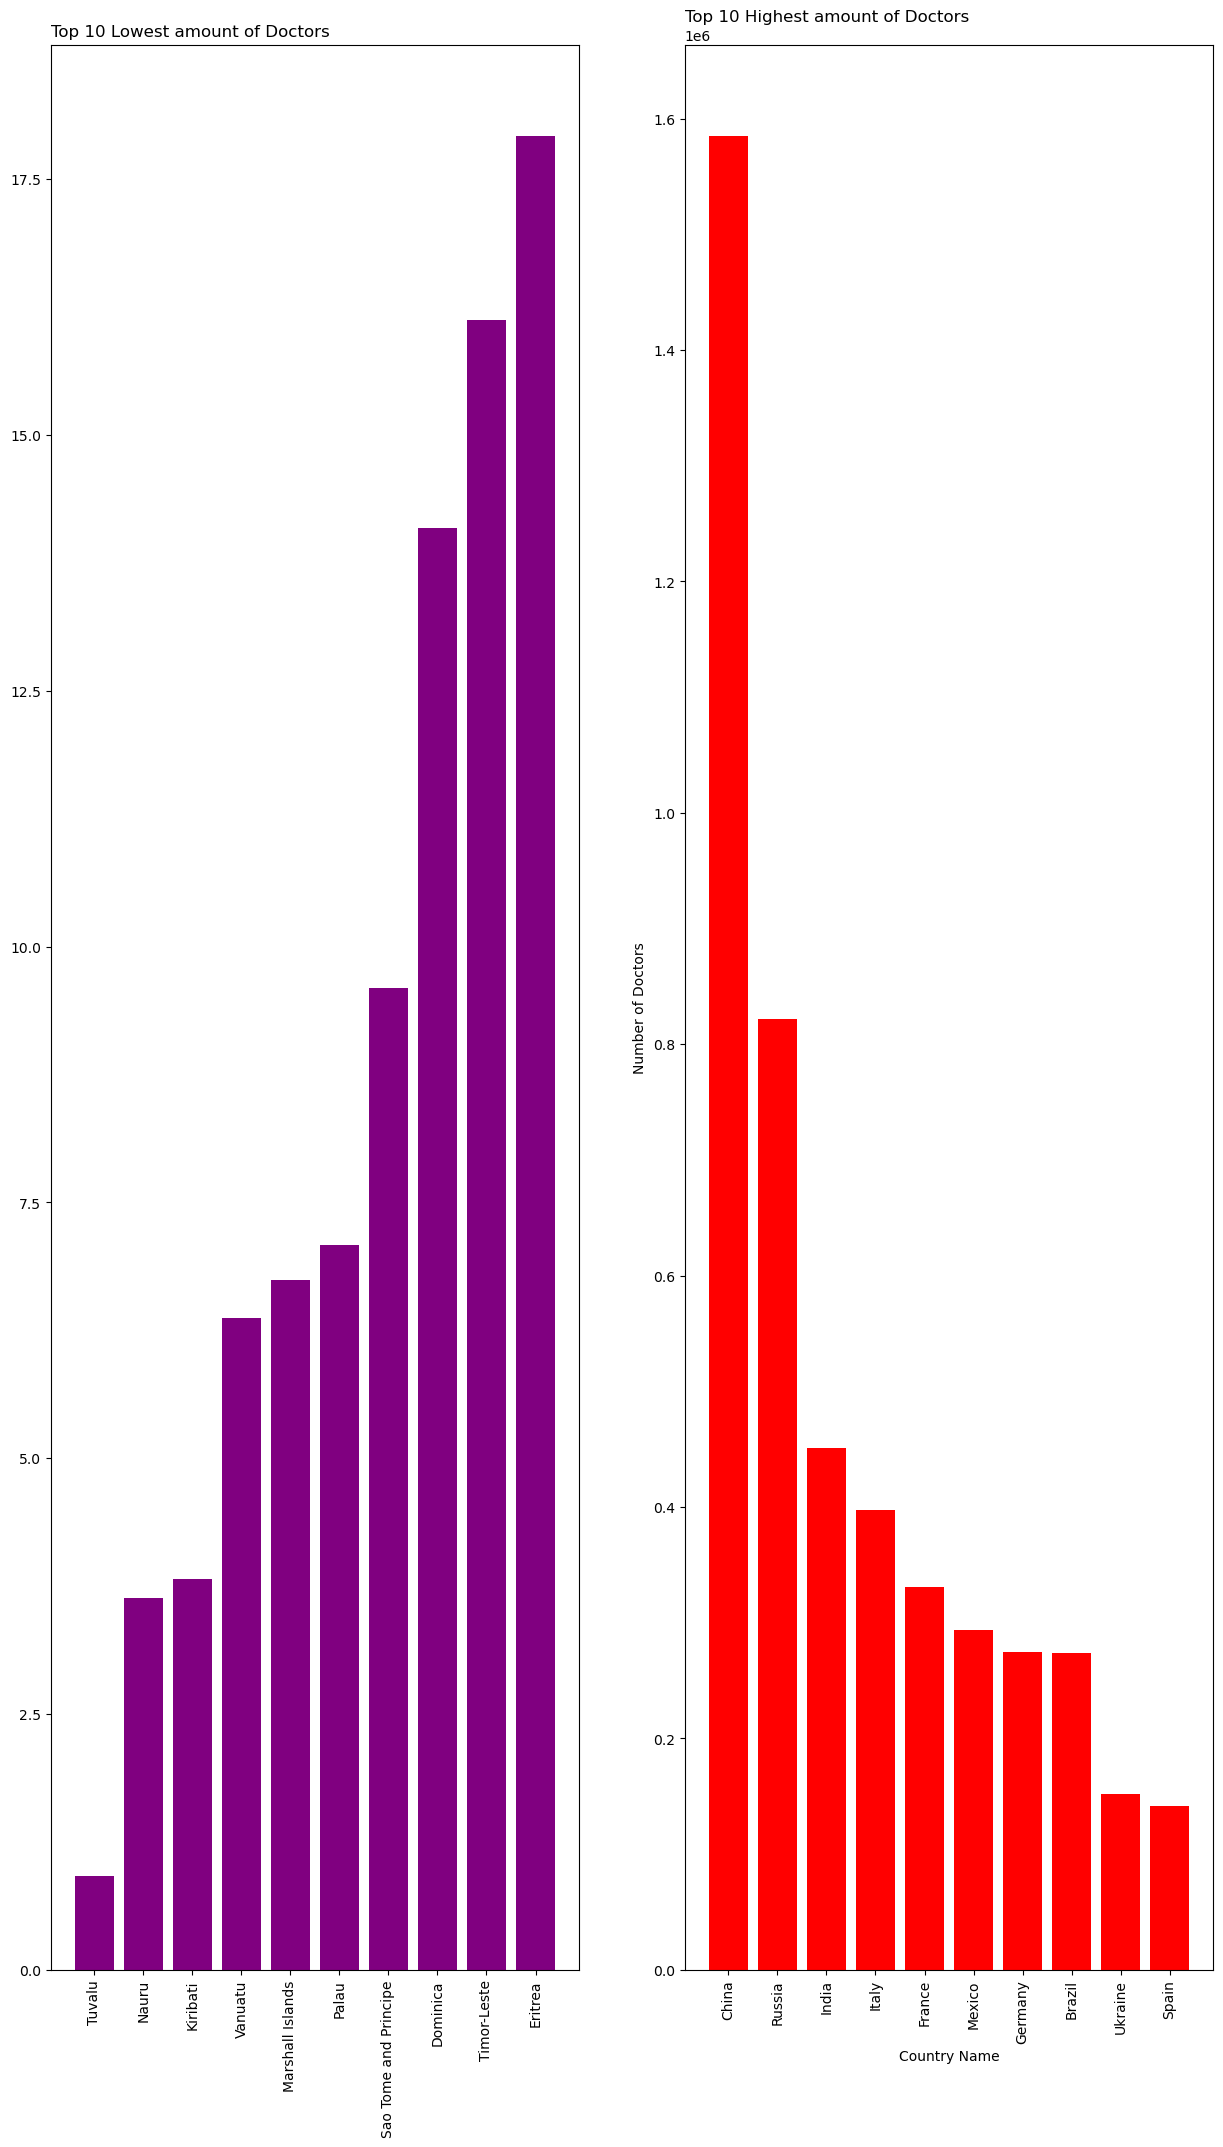

In [32]:
#Plotting on to a subplot graph
fig, axs = plt.subplots(1,2, figsize=(15,25))
#Top left
axs[0].bar(top10_lowdocs.index, top10_lowdocs, color='purple')
axs[0].set_xticklabels(top10_lowdocs.index, rotation=90)
axs[0].set_title('Top 10 Lowest amount of Doctors', loc='left')
#Top right
axs[1].bar(top10_highdocs.index, top10_highdocs, color='red')
axs[1].set_xticklabels(top10_highdocs.index, rotation=90)
axs[1].set_title('Top 10 Highest amount of Doctors', loc='left')
plt.xlabel('Country Name')
plt.ylabel('Number of Doctors')

#Saving the plot
plt.savefig('../Graphs/Top 10 Highest and Lowest amount of Doctors.png')

## Findings
<br>
The graph on left above shows us the Top 10 countries that would potential benefit from receiving additionally support from external doctors. Using the describle function as seen below we can see the huge variation between min and max of the dataset but an even clearer understanding of the spread by looking at the standard deviation.

In [33]:
total_docs.describe()

count    1.870000e+02
mean     3.583897e+04
std      1.428040e+05
min      9.150015e-01
25%      1.242006e+02
50%      2.199219e+03
75%      1.400471e+04
max      1.584598e+06
dtype: float64

# How does the number of doctors correlate with the amount of money spent by the government on healthcare?

### Calculating the average money spent by the governement on healthcare

In [34]:
pop_aidmerged.head()

,country,1995 Populations,1996 Populations,1997 Populations,1998 Populations,1999 Populations,2000 Populations,2001 Populations,2002 Populations,2003 Populations,...,2001 Health Aid,2002 Health Aid,2003 Health Aid,2004 Health Aid,2005 Health Aid,2006 Health Aid,2007 Health Aid,2008 Health Aid,2009 Health Aid,2010 Health Aid
0,Afghanistan,16400000.0,17100000.0,17800000.0,18500000.0,19300000.0,19500000.0,19700000.0,21000000.0,22600000.0,...,0.0,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
1,Angola,13900000.0,14400000.0,14900000.0,15400000.0,15900000.0,16400000.0,16900000.0,17500000.0,18100000.0,...,18.3,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00
2,Albania,3280000.0,3270000.0,3250000.0,3230000.0,3210000.0,3180000.0,3150000.0,3120000.0,3090000.0,...,30.5,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
3,Andorra,62900.0,64100.0,64700.0,65200.0,65700.0,66100.0,67800.0,70800.0,73900.0,...,890.0,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00
4,United Arab Emirates,2430000.0,2570000.0,2750000.0,2920000.0,3100000.0,3280000.0,3450000.0,3630000.0,3810000.0,...,638.0,578.000,611.00,588.00,608.00,659.00,718.0,1010.00,1310.00,1080.00


In [35]:
#First need to calculate the total money spent
def money_invested(data):
    money_spent = pd.DataFrame()
    money_spent['country'] = health_aid['country']
    for yr in range(1995,2011):
        population_column = f'{yr} Populations'
        health_aid_column = f'{yr} Health Aid'
        new_column_name = f'{yr}'
    
        money_spent[new_column_name]=data[population_column]*data[health_aid_column]
    return money_spent

money_spent = money_invested(pop_aidmerged)

In [36]:
# dropping any data points that may have popped up due to one df having the country whilst the other
# didn't
money_spent = money_spent.dropna(subset=money_spent.columns[1:], thresh = 2)
money_spent

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.749300e+07,2.825000e+07,3.799600e+07,6.148800e+07,7.137400e+07,9.065000e+07,9.900000e+07,1.071340e+08,1.237980e+08
1,Angola,1.876500e+08,1.255680e+08,1.564500e+08,1.024100e+08,1.041450e+08,2.050000e+08,3.092700e+08,2.502500e+08,3.511400e+08,3.703600e+08,5.284500e+08,1.028180e+09,1.429560e+09,2.734200e+09,4.072500e+09,2.386800e+09
2,Albania,4.559200e+07,5.591700e+07,4.615000e+07,6.007800e+07,9.020100e+07,8.649600e+07,9.607500e+07,1.014000e+08,1.254540e+08,1.955340e+08,2.163420e+08,2.265000e+08,2.646240e+08,3.215500e+08,3.135100e+08,2.735400e+08
3,Andorra,5.642130e+07,6.301030e+07,6.256490e+07,8.736800e+07,6.188940e+07,5.697820e+07,6.034200e+07,7.221600e+07,9.607000e+07,1.168880e+08,1.300740e+08,1.483700e+08,1.642200e+08,1.803570e+08,1.744040e+08,1.551550e+08
4,UAE,1.416690e+09,1.490600e+09,1.617000e+09,1.649800e+09,1.732900e+09,1.892560e+09,2.201100e+09,2.098140e+09,2.327910e+09,2.346120e+09,2.602240e+09,3.229100e+09,4.214660e+09,7.059900e+09,1.046690e+10,9.158400e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Samoa,9.108000e+08,1.212600e+09,1.347960e+09,1.314630e+09,1.544880e+09,1.508940e+09,1.469160e+09,1.674240e+09,1.903650e+09,2.266300e+09,2.465820e+09,2.959000e+09,3.876600e+09,3.988800e+09,3.722400e+09,5.119400e+09
188,Yemen,1.413600e+06,1.254000e+06,1.076160e+06,1.151400e+06,1.231200e+06,1.550400e+06,1.630200e+06,1.604600e+06,1.875800e+06,1.638500e+06,1.601600e+06,1.809300e+06,1.898100e+06,2.321000e+06,1.848000e+06,1.667700e+06
189,South Africa,2.364700e+09,2.201240e+09,2.553000e+09,2.444000e+09,2.592000e+09,2.488800e+09,2.253450e+09,2.061950e+09,3.250800e+09,3.956200e+09,4.672500e+09,4.986400e+09,5.555000e+09,5.663700e+09,6.452400e+09,8.208200e+09
190,Zambia,9.741600e+08,9.737000e+08,1.278480e+09,1.048560e+09,7.044620e+08,7.291700e+08,9.336600e+08,1.184820e+09,1.320300e+09,1.514320e+09,2.002710e+09,2.940000e+09,2.637280e+09,3.697920e+09,3.174550e+09,3.836860e+09


### Calculating the average spend

In [37]:
aid_aver = money_spent.set_index('country').mean(axis=1)
aid_aver_sorted = aid_aver.sort_values(ascending=False)
aid_aver

country
Afghanistan     3.982394e+07
Angola          8.963708e+08
Albania         1.574352e+08
Andorra         1.053955e+08
UAE             3.469001e+09
                    ...     
Samoa           2.330324e+09
Yemen           1.598222e+06
South Africa    3.856521e+09
Zambia          1.809434e+09
Zimbabwe        2.191325e+06
Length: 191, dtype: float64

### Sorting the data

In [38]:
#Sorting Decending & Ascending and taking the top 10 for each list
sortedspend_dec = aid_aver.sort_values(ascending=False)
top_10spendhigh = sortedspend_dec.head(10)
top_10spendlow = sortedspend_dec.tail(10)
sortedspend = top_10spendhigh.append(top_10spendlow)
sortedspend

/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/2561560427.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortedspend = top_10spendhigh.append(top_10spendlow)


country
Ireland                  2.440841e+12
Niue                     1.377966e+11
Iceland                  8.287550e+10
Norway                   6.743938e+10
Canada                   6.697381e+10
USA                      5.974100e+10
Czech Republic           5.332134e+10
Palau                    4.874478e+10
China                    4.826762e+10
Panama                   4.164069e+10
Guinea-Bissau            3.282068e+06
Djibouti                 2.518684e+06
Zimbabwe                 2.191325e+06
Uruguay                  1.635410e+06
Yemen                    1.598222e+06
Lesotho                  9.455219e+05
Sao Tome and Principe    8.062906e+05
Mali                     5.318049e+05
Papua New Guinea         4.880419e+05
Madagascar               2.410431e+05
dtype: float64

### SubPlotting the data

/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/1817636031.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_10spendlow.index, rotation=90)
/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/1817636031.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_10spendhigh.index, rotation=90)


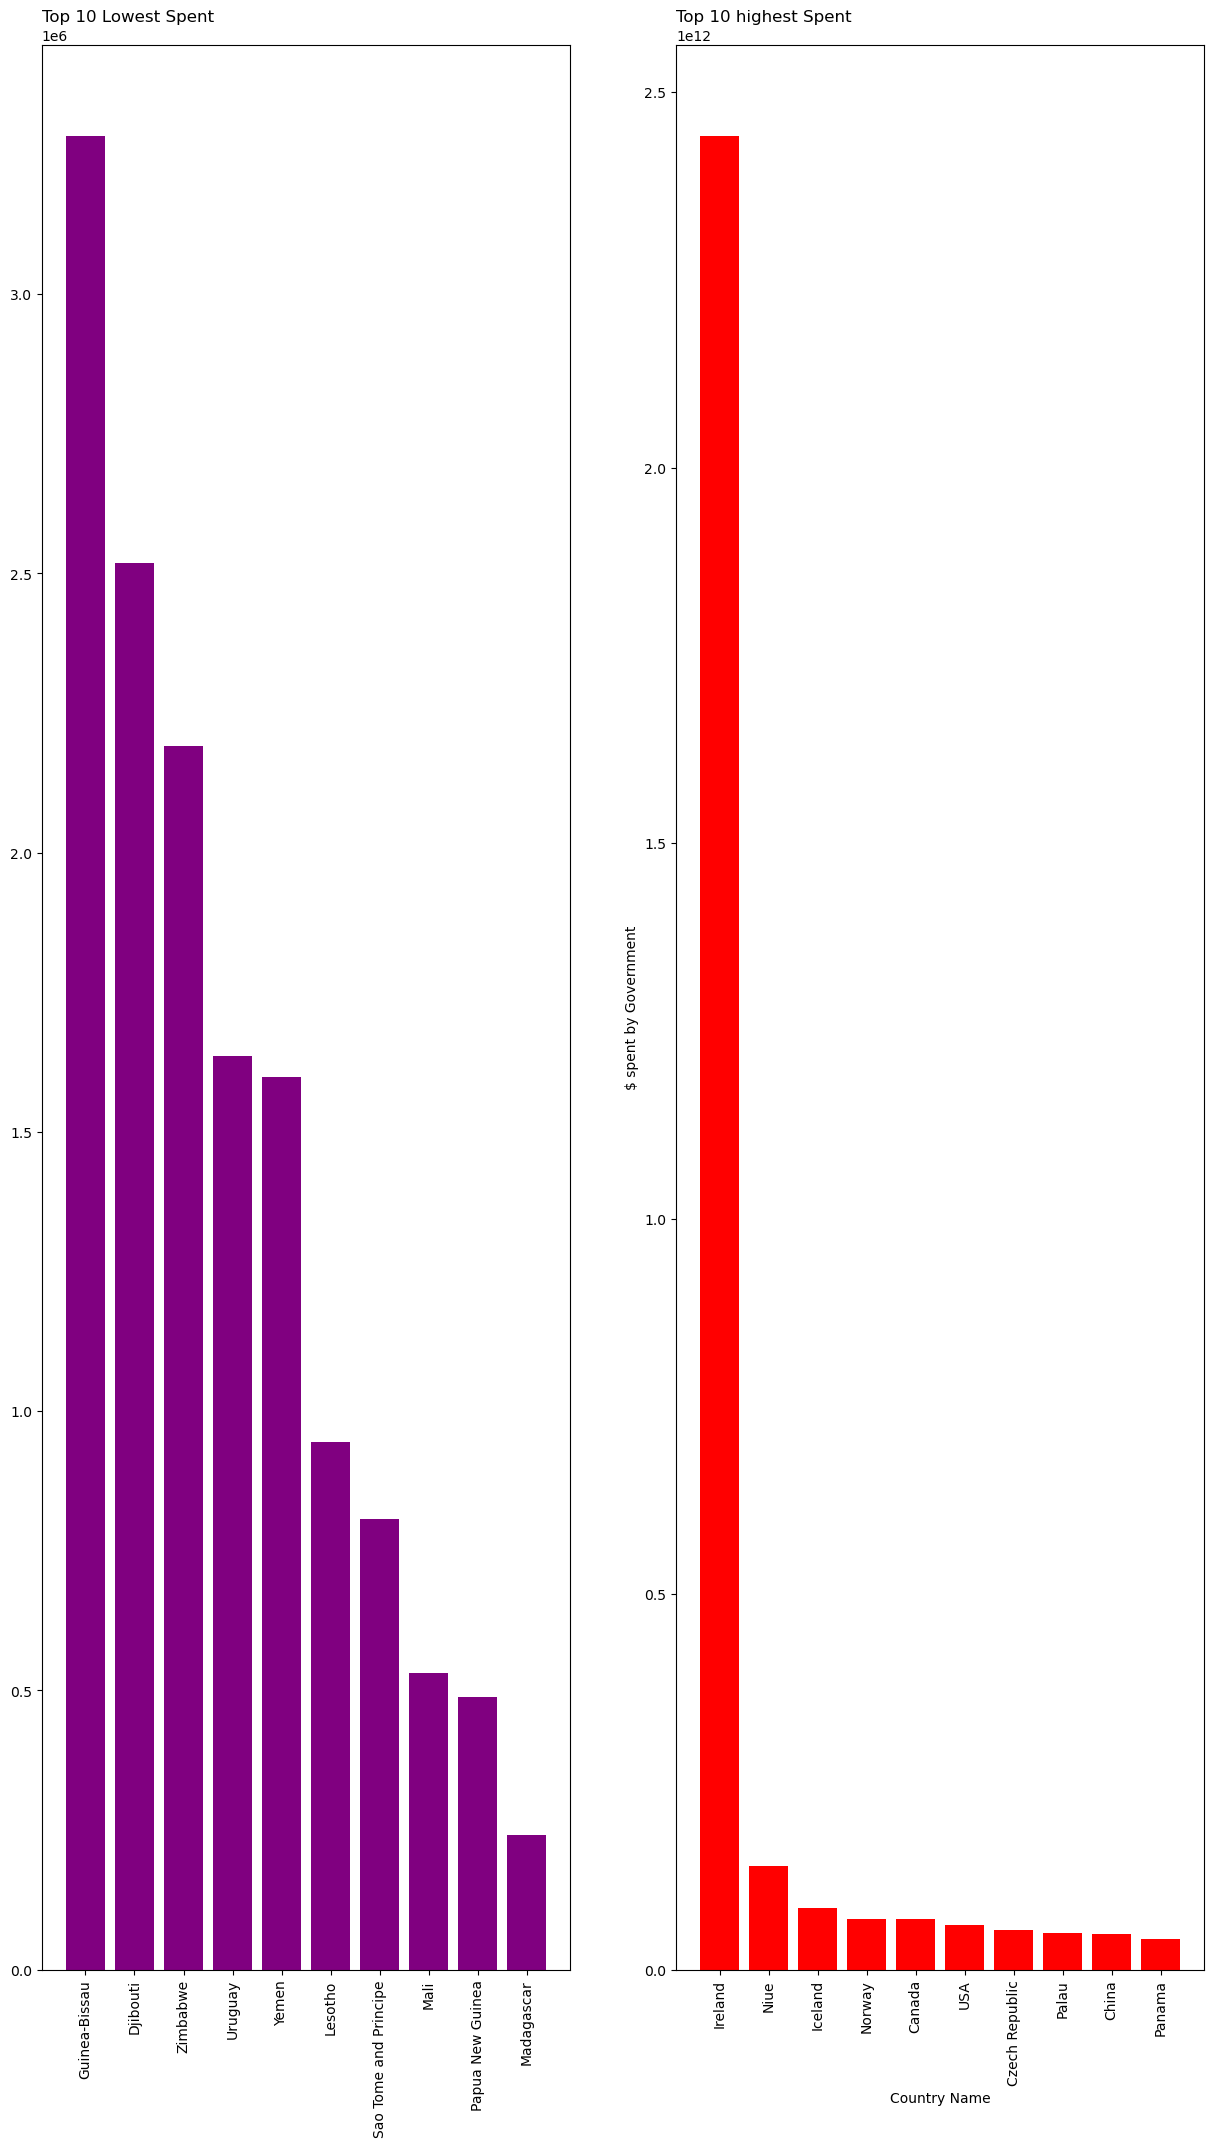

In [39]:
#Subplot
fig, axs = plt.subplots(1,2, figsize=(15,25))
#Top left
axs[0].bar(top_10spendlow.index, top_10spendlow, color='purple')
axs[0].set_xticklabels(top_10spendlow.index, rotation=90)
axs[0].set_title('Top 10 Lowest Spent', loc='left')
#Top right
axs[1].bar(top_10spendhigh.index, top_10spendhigh, color='red')
axs[1].set_xticklabels(top_10spendhigh.index, rotation=90)
axs[1].set_title('Top 10 highest Spent', loc='left')
plt.xlabel('Country Name')
plt.ylabel('$ spent by Government')
#Saving the plot
plt.savefig('../Graphs/Top 10 Highest and Lowest Countries that have invested into Healthcare.png')

### Findings
The graphs above help us identify the countries that have the highest and lowest government contribution to their populations healthcare. We can see from the standard deviation shown below the spread just between these data points above is $81 billion, which is a number that is just emorse to compute mentally, unless you are a billionaire I guess.

In [40]:
sortedspend.std()

540031029687.5272

### Extracting the Top 10 highest and lowest countries Government Spend equivalent Total amount of Doctors

In [41]:
common_countries = sortedspend.index.intersection(total_docs.index)

sortedspend = sortedspend[common_countries].sort_values()
total_docs = total_docs[common_countries]

### Plotting Average spend and Total doctors

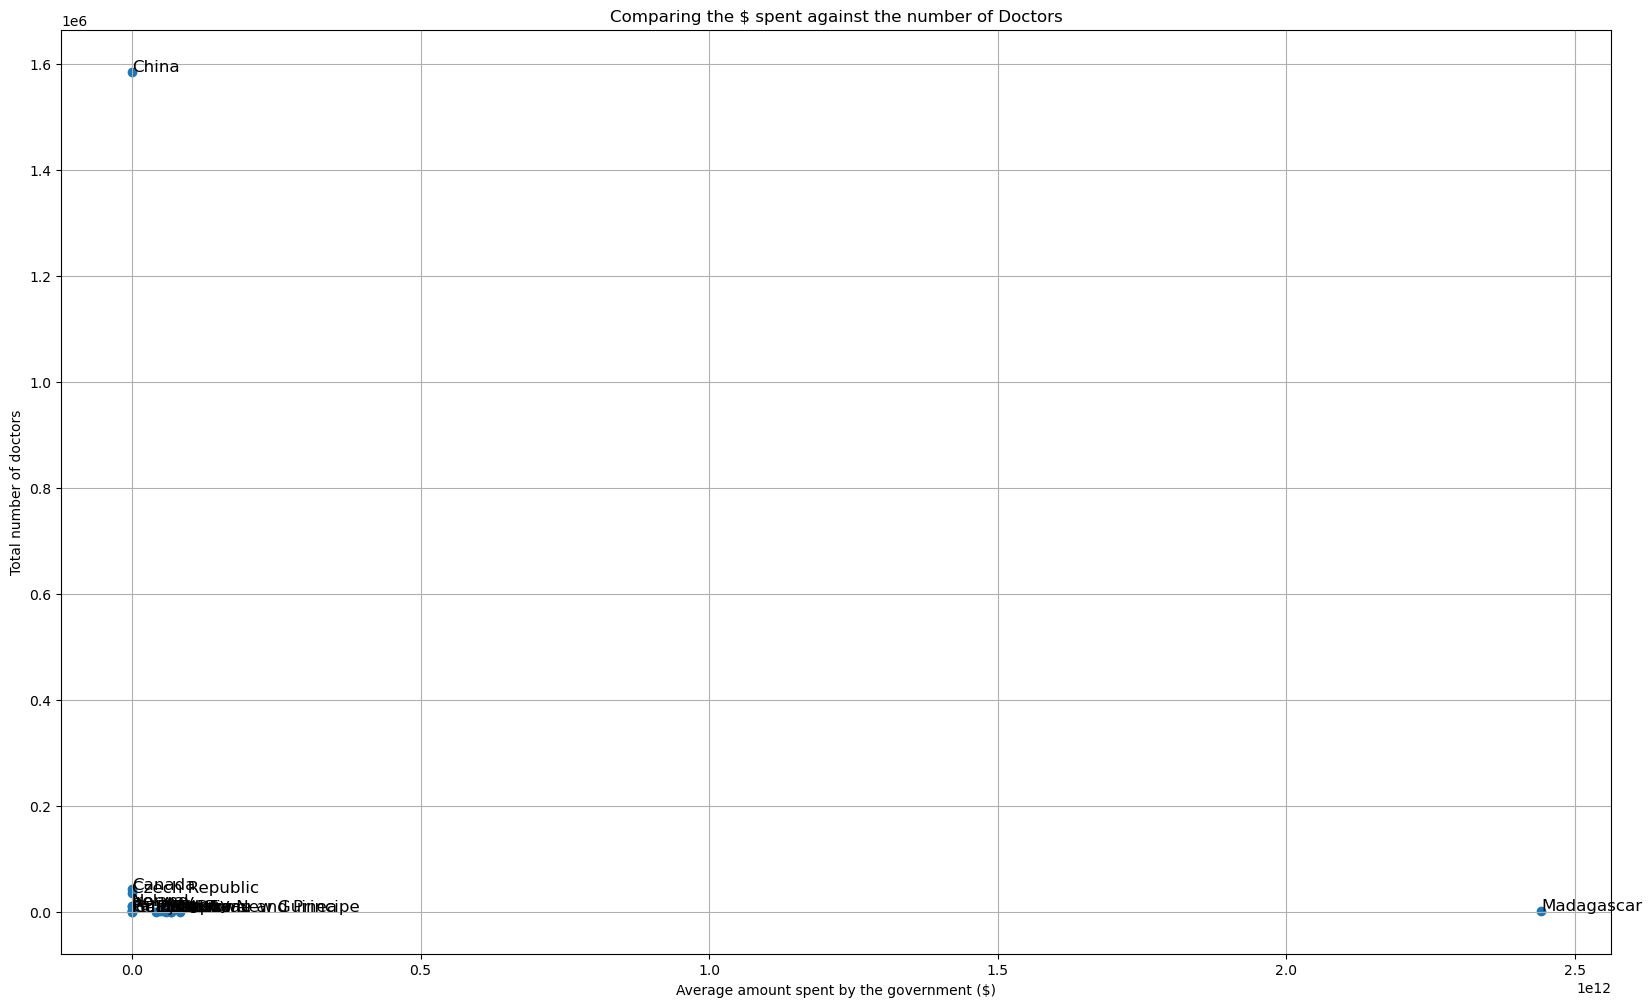

In [42]:
# Creating a scatter plot
plt.figure(figsize=(20, 12))
plt.scatter(sortedspend, total_docs, label='Data Points', marker='o')
plt.xlabel('Average amount spent by the government ($)')
plt.ylabel('Total number of doctors')
plt.title('Comparing the $ spent against the number of Doctors')
plt.grid(True)
# Add labels for each point (country) 
for i, country in enumerate(total_docs.index):
    plt.annotate(country, (sortedspend[i], total_docs[i]), fontsize=12)
# Saving the graph
plt.savefig('../Graphs/Top 10 Highest and Lowest healthcare spend countries against the number of doctors.png')

### Findings
<br>
Looking at the scatter graph above we can see generally that the amount of money spent by the government doesn't correlate with the total number of doctors a country has. now we do a slight anomoly with China, who have a significant amount deviation in the amount of doctors they have compared to the other countries. It would be interesting into diving deeper into the reason behind it, for example was there a incentive pushing more people into becoming a doctor or has another factor lead to more people relocating to the country.

# How does the Life Expectancy correlate with Top 10 Highest and Lowest total amount of doctors?

In [43]:
#Reminding myself of the life expectancy data
life_expect23

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,54.3,54.7,54.5,53.3,54.7,54.7,54.8,55.5,56.5,57.1,57.6,58.0,58.5,59.2,59.9,60.5
1,Angola,51.2,51.7,51.6,50.6,51.9,52.8,53.4,54.5,55.1,55.5,56.4,57.0,58.0,58.8,59.5,60.2
2,Albania,74.6,74.5,72.9,74.8,75.1,75.4,76.0,75.9,75.6,75.8,76.2,76.9,77.5,77.6,78.0,78.1
3,Andorra,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1,81.2,81.3,81.4,81.5,81.7,81.8,81.8,81.8
4,United Arab Emirates,68.8,68.9,69.0,69.2,69.2,69.1,69.2,69.4,69.3,69.1,69.2,69.5,70.0,70.4,70.6,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,67.7,67.8,68.0,68.2,68.3,68.5,68.6,68.8,68.9,69.0,69.0,69.2,69.3,69.5,67.5,69.6
191,Yemen,61.1,61.5,62.0,62.5,63.0,63.5,64.0,64.5,64.9,65.3,65.8,66.2,66.5,66.9,67.2,67.6
192,South Africa,62.9,61.8,59.5,58.0,57.2,55.6,54.8,53.7,52.7,52.2,52.1,52.3,53.2,54.3,55.7,57.1
193,Zambia,46.8,46.1,45.7,45.5,45.3,45.3,45.2,45.9,46.6,47.7,48.7,50.0,51.9,54.1,55.7,56.5


### Identifying the Top 10 highest and lowest countries on the life expectancy ranking

In [44]:
# getting the top 10 and lowest 10 countries 
life_expecthigh = life_expect23.loc[life_expect23.max(axis=1).nlargest(10).index]
life_expectlow = life_expect23.loc[life_expect23.max(axis=1).nsmallest(10).index]
# Merging them
life_highlow = pd.concat([life_expecthigh, life_expectlow])
life_highlow


/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/1990629593.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  life_expecthigh = life_expect23.loc[life_expect23.max(axis=1).nlargest(10).index]
/var/folders/pj/jq7g3ftn5557342n7bvxr3q80000gn/T/ipykernel_10500/1990629593.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  life_expectlow = life_expect23.loc[life_expect23.max(axis=1).nsmallest(10).index]


,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
87,Japan,80.2,80.7,81.0,81.0,81.2,81.6,81.9,82.2,82.3,82.5,82.5,82.8,82.9,83.1,83.3,83.3
30,Switzerland,78.9,79.3,79.6,79.9,80.1,80.3,80.6,80.9,81.1,81.4,81.7,81.9,82.2,82.4,82.5,82.8
72,"Hong Kong, China",78.7,79.0,79.3,79.6,80.0,80.4,80.7,81.1,81.4,81.7,81.9,82.1,82.3,82.5,82.7,82.8
152,Singapore,77.1,77.4,77.9,78.3,78.8,79.4,79.8,80.1,80.4,80.7,81.3,81.6,81.8,82.1,82.5,82.8
82,Iceland,78.4,79.0,79.2,79.5,79.9,80.3,80.6,80.8,81.2,81.4,81.6,81.7,81.9,82.2,82.4,82.6
8,Australia,78.3,78.5,78.8,79.1,79.4,79.7,80.1,80.3,80.6,80.9,81.2,81.5,81.5,81.7,81.9,82.1
53,Spain,78.1,78.3,78.8,79.0,79.1,79.5,79.8,79.9,80.0,80.3,80.6,81.0,81.2,81.4,81.8,82.1
84,Italy,78.2,78.5,78.8,79.0,79.3,79.6,79.9,80.2,80.3,80.8,81.0,81.3,81.5,81.6,81.8,82.1
83,Israel,77.8,78.0,78.2,78.4,78.7,78.9,79.0,78.9,79.5,79.9,80.3,80.4,80.8,81.0,81.4,81.9
156,San Marino,80.7,80.9,81.1,81.3,81.5,81.5,81.6,81.7,81.7,81.6,81.6,81.6,81.7,81.8,81.8,81.9


### Plotting the Line Graph

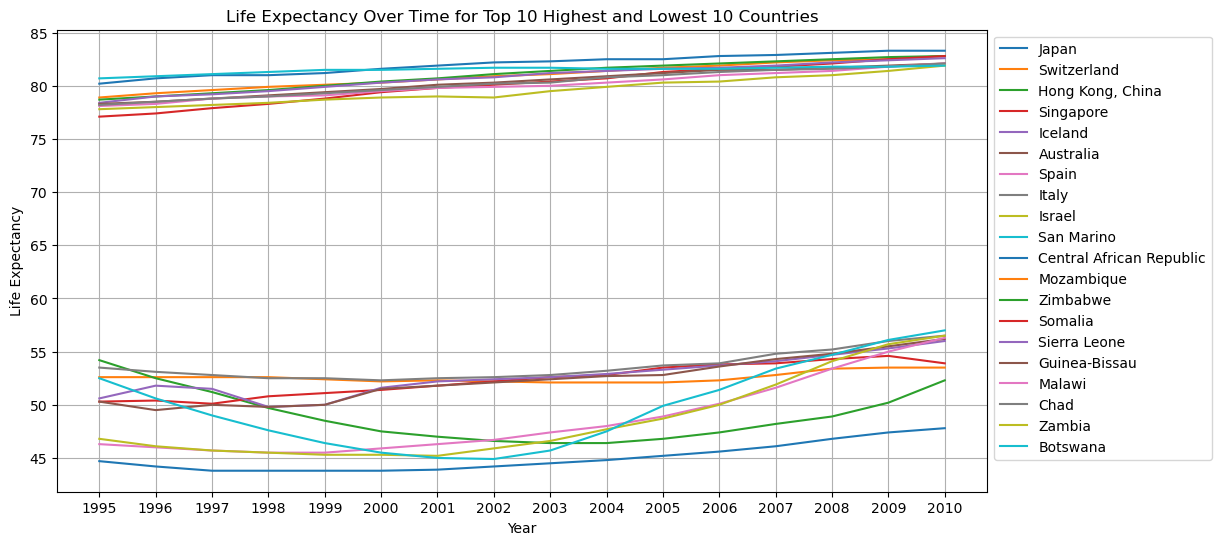

In [45]:
plt.figure(figsize=(12, 6))
for index, row in life_highlow.iterrows():
    plt.plot(row.index[1:], row.values[1:], label=row['country'])

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time for Top 10 Highest and Lowest 10 Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('../Graphs/Life Expectancy over time for Top 10 Highest and Lowest Countries.png')


### Findings
The line graph helps us visualise the deviation in life expectancy between the top 10 and lowest 10. We do also see the a linear increase as the years go in majority og the countries, it would be interesting to understand why this is the case. Is it due to the healthcare service increasing, significant medical advances that have helpd or are people just happier.

However the most interesting ones are China and San Marino, who took a significant deep before starting to increase in 2002. Another factor that would be interesting in researching further into, what caused this dip, could it have been cause by polution issues or a virus/disease that was spreading.

### Calculating the mean life expectancy and extracting the relavent data for the  countries from Top 10 highest and lowest doctors list

In [46]:
#calculating the mean
aver_life = life_expect23.set_index('country').mean(axis=1)
#matching and extracting
common_countries = aver_life.index.intersection(high_lowdocs.index)
toplife = aver_life[common_countries]
aver_life, high_lowdocs

(country
 Afghanistan             56.48750
 Angola                  54.88750
 Albania                 75.93125
 Andorra                 81.01875
 United Arab Emirates    69.48125
                           ...   
 Samoa                   68.61875
 Yemen                   64.53125
 South Africa            55.81875
 Zambia                  48.56250
 Zimbabwe                48.98750
 Length: 195, dtype: float64,
 country
 China                    1.584598e+06
 Russia                   8.215401e+05
 India                    4.510185e+05
 Italy                    3.971651e+05
 France                   3.312257e+05
 Mexico                   2.936884e+05
 Germany                  2.742599e+05
 Brazil                   2.734231e+05
 Ukraine                  1.523389e+05
 Spain                    1.413788e+05
 Tuvalu                   9.150015e-01
 Nauru                    3.637359e+00
 Kiribati                 3.819793e+00
 Vanuatu                  6.367324e+00
 Marshall Islands         6.7413

### Plotting the graph

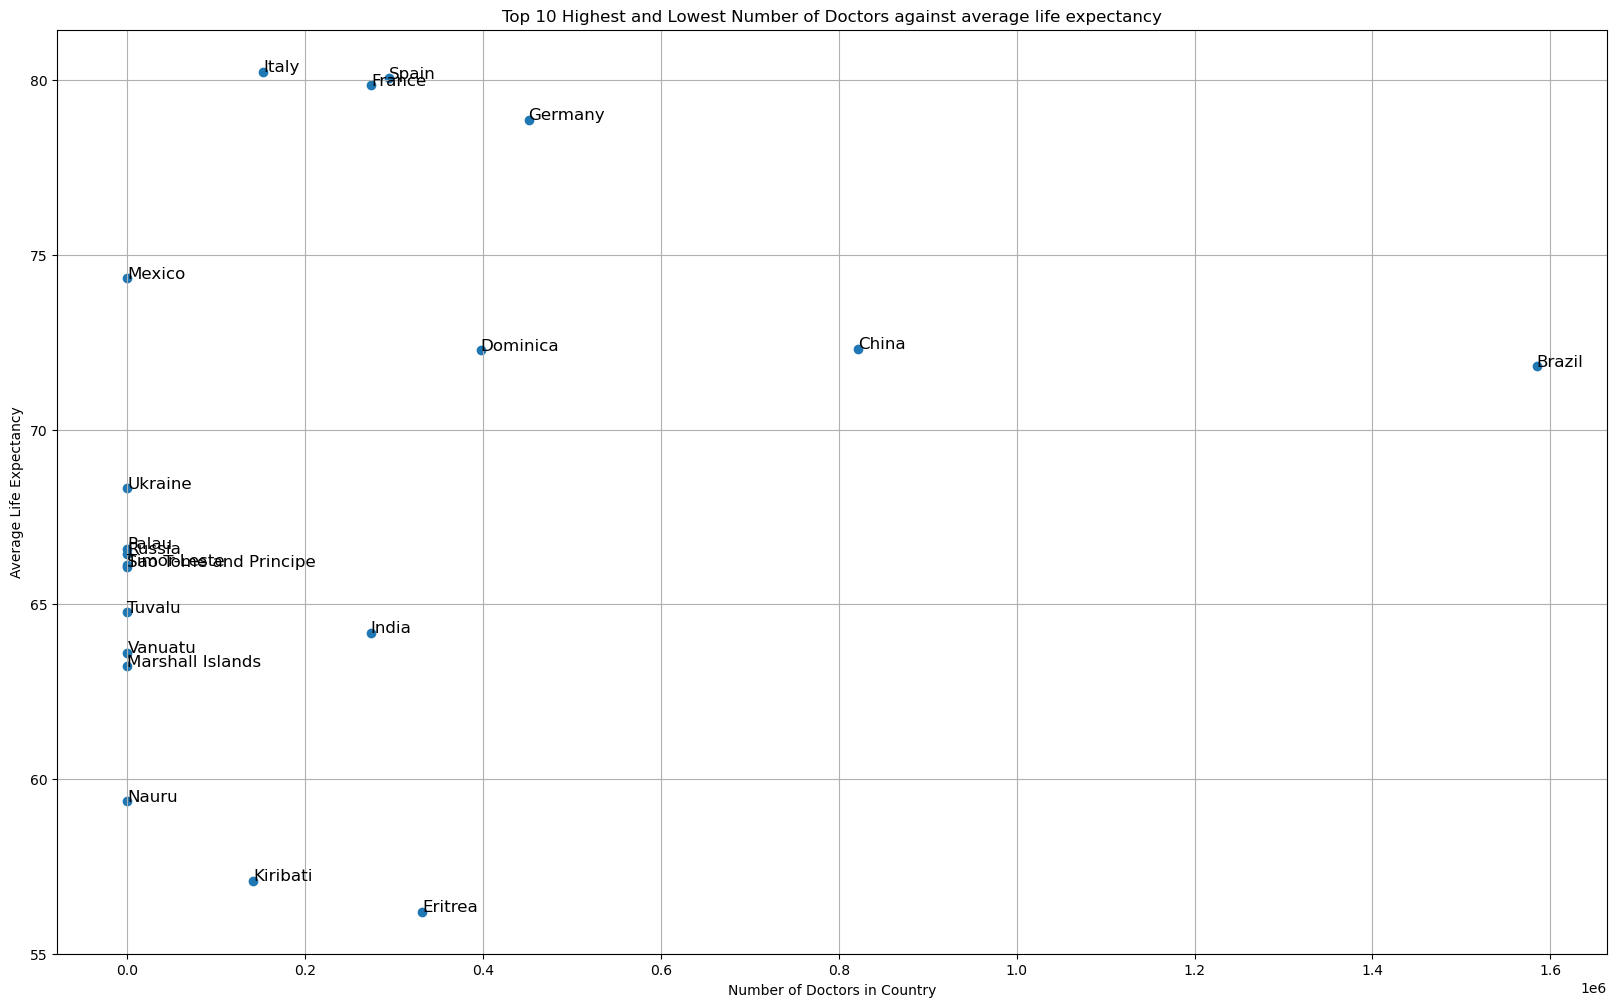

In [47]:
# Creating a scatter plot
plt.figure(figsize=(20, 12))
plt.scatter(high_lowdocs, toplife, label='Data Points', marker='o')
plt.xlabel('Number of Doctors in Country')
plt.ylabel('Average Life Expectancy')
plt.title('Top 10 Highest and Lowest Number of Doctors against average life expectancy')
plt.grid(True)

for i, country in enumerate(toplife.index):
    plt.annotate(country, (high_lowdocs[i], toplife[i]), fontsize=12)
# Saving the graph
plt.savefig('../Graphs/Top 10 Highest and Lowest No of Doctors against their average life expectancy.png')

### Findings
<br>
The scatterplot above shows spending more may not always help improve the life expectancy and they are other factors that will need to be taken into consideration such as life conditions, living cost against average salary, as it could help reduce the amount of stress and help increase the life expectancy.

We can also see that a country like Japan who had the highest contribution from the government, has a low number of doctors but one of the highest life expectancy. What makes them so different.